# **Importação dos pacotes para analise dos dados e criação do modelo**

In [0]:
#import some packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from time import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Analise Exploratória dos dados**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
print(os.listdir('gdrive/My Drive/Colab Notebooks'))

['Projeto Final v030519-3.ipynb', 'train.csv', 'test.csv', 'Copy of Projeto Final v040519-1.ipynb', 'Projeto Final v050519-2 - Concatenated.ipynb', 'Projeto Final v050519-1.ipynb', 'Projeto Final v060519-1.ipynb', 'Projeto Final v070519-1.ipynb', 'Projeto Final v080519-1.ipynb', 'Projeto Final v080519-2.ipynb', 'Projeto Final v100519-1.ipynb', 'Projeto Final v100519-2.ipynb', 'Projeto Final v120519-1.ipynb']


In [4]:
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

[](http://)Temos 38 variáveis numericas (3 são floats e 35 são integrais) e temos 43 variáveis categoricas (estão inclusa o Id e o SalePrice).

In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Frequency')

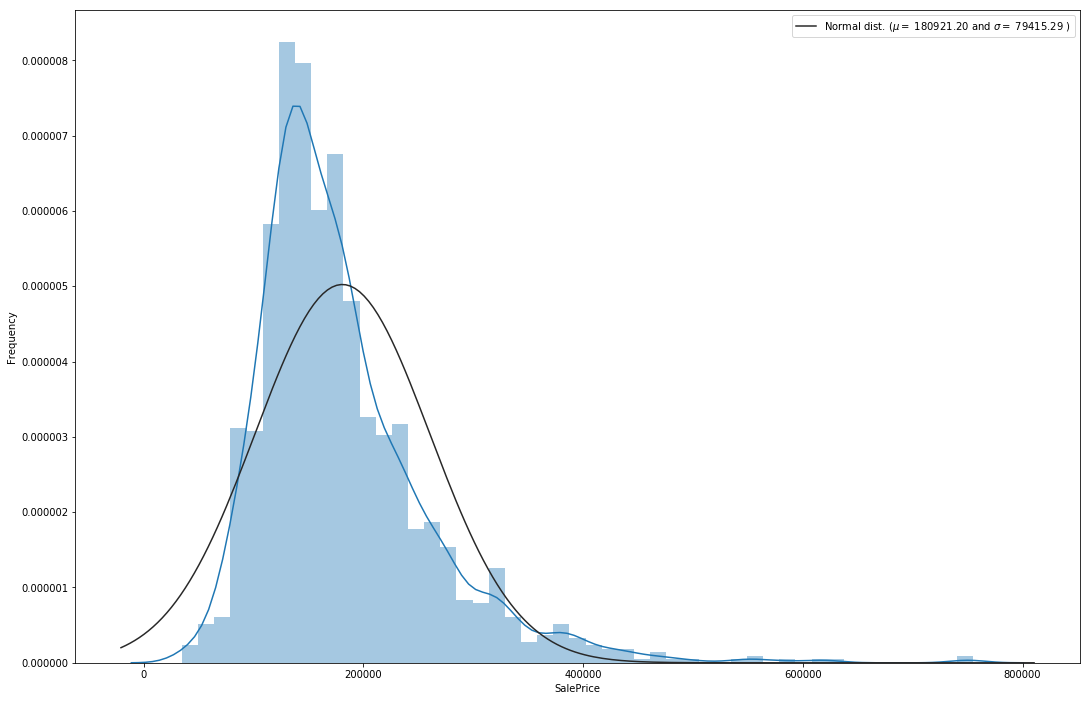

In [7]:
# Histograma na variavel alvo - SalePrice
plt.subplots(figsize=(18,12))
sns.distplot(df_train['SalePrice'], fit=stats.norm)

# Adicionando paramêtros

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

# Plotar
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

A variavel SalePrice está com Skewed a direita. Iremos transformar a variavel para uma distribuição normal 

Text(0, 0.5, 'Frequency')

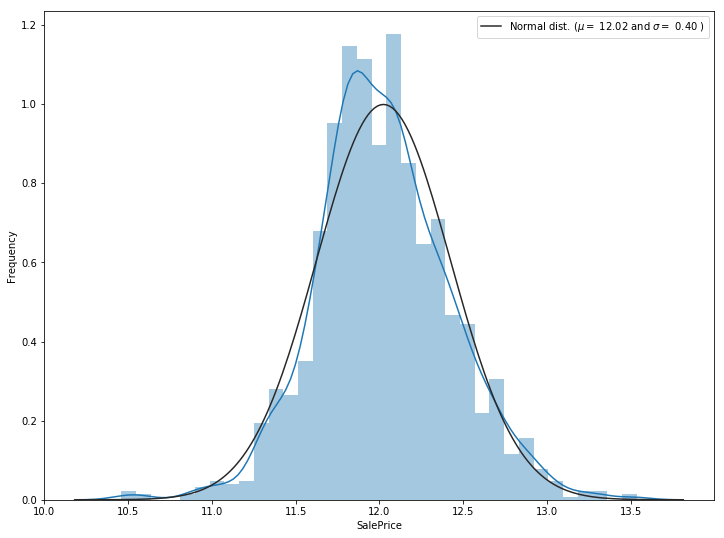

In [8]:
# Usando a função de log do numpy
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Verificando a distribuição normal

plt.subplots(figsize=(12,9))
sns.distplot(df_train['SalePrice'], fit=stats.norm)

# Adicionando parâmetros estatísticos

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])

# Plotando

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# **Processamento dos Dados**

**Verificação dos valores ausentes**

In [9]:
y_train = df_train['SalePrice'].values
df_train.drop(['Id'], axis = 1, inplace = True)
df_train.shape

(1460, 80)

In [10]:
percentual_ausentes = df_train.isnull().sum() / len(df_train) * 100
ausentes = percentual_ausentes[percentual_ausentes > 0]
ausentes.sort_values(ascending = False, inplace = True)
ausentes

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [11]:
ausentes = ausentes.to_frame()
ausentes.columns = ['%']
ausentes.index.names = ['Names']
ausentes['Names'] = ausentes.index
ausentes.tail()

,%,Names
Names,,
BsmtCond,2.534247,BsmtCond
BsmtQual,2.534247,BsmtQual
MasVnrArea,0.547945,MasVnrArea
MasVnrType,0.547945,MasVnrType
Electrical,0.068493,Electrical


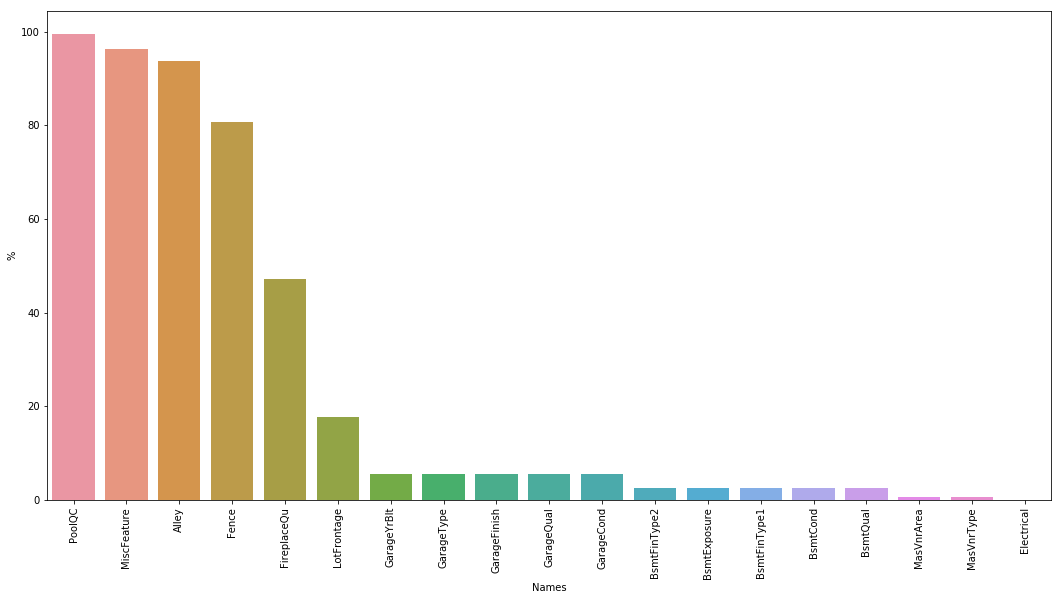

In [12]:
#plot Missing values
plt.figure(figsize=(18,9))
sns.barplot(x='Names', y='%',data=ausentes)
plt.xticks(rotation = 90)
plt.show()

**Correlação**

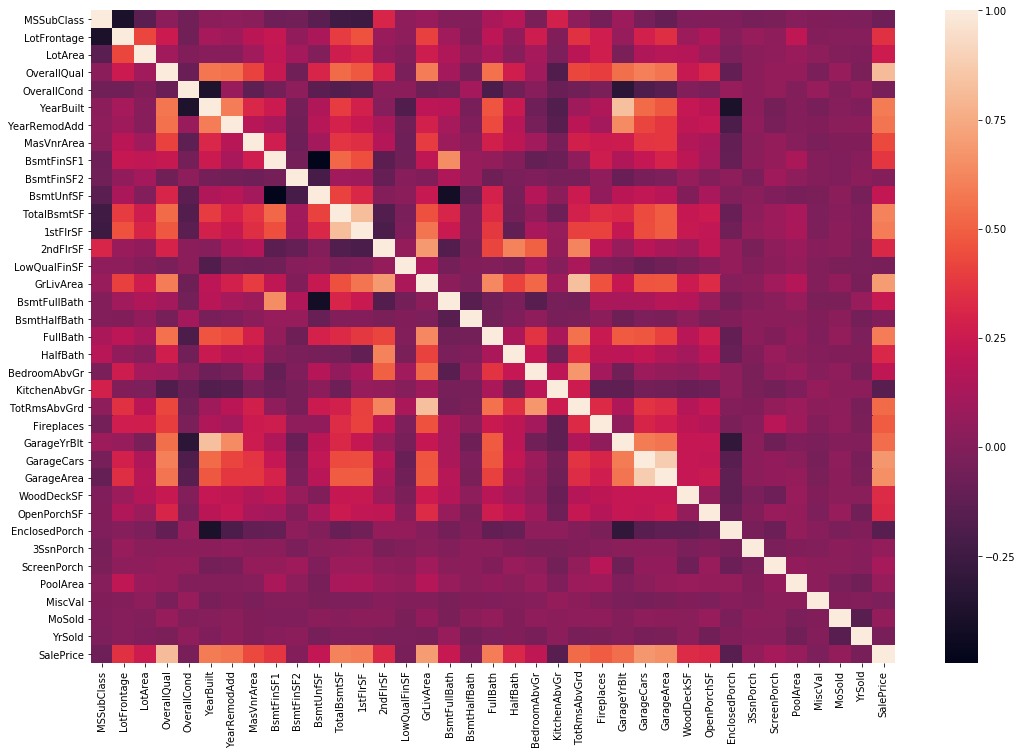

In [13]:
correlacao = df_train.corr()
plt.subplots(figsize = (18,12))
sns.heatmap(correlacao)

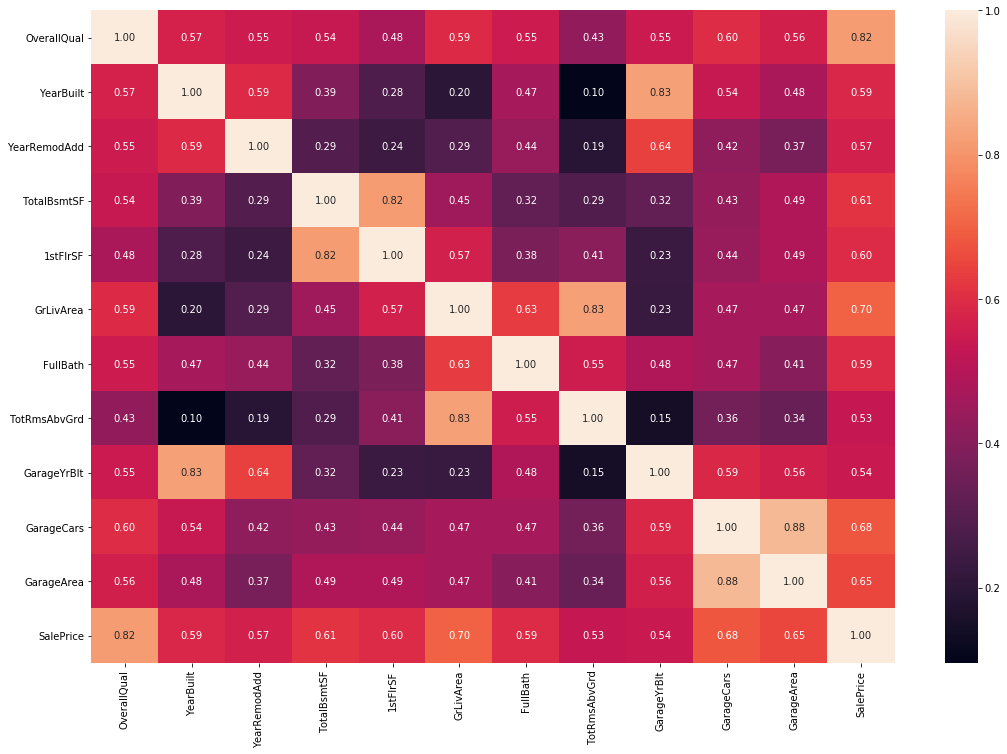

In [14]:
#10 variavéis com maior correlação 
top_variavel = correlacao.index[abs(correlacao['SalePrice'] > 0.5)]
top_correlacao = df_train[top_variavel].corr()
plt.subplots(figsize = (18,12))
sns.heatmap(top_correlacao, annot=True, fmt='.2f')

In [15]:
print(top_variavel)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


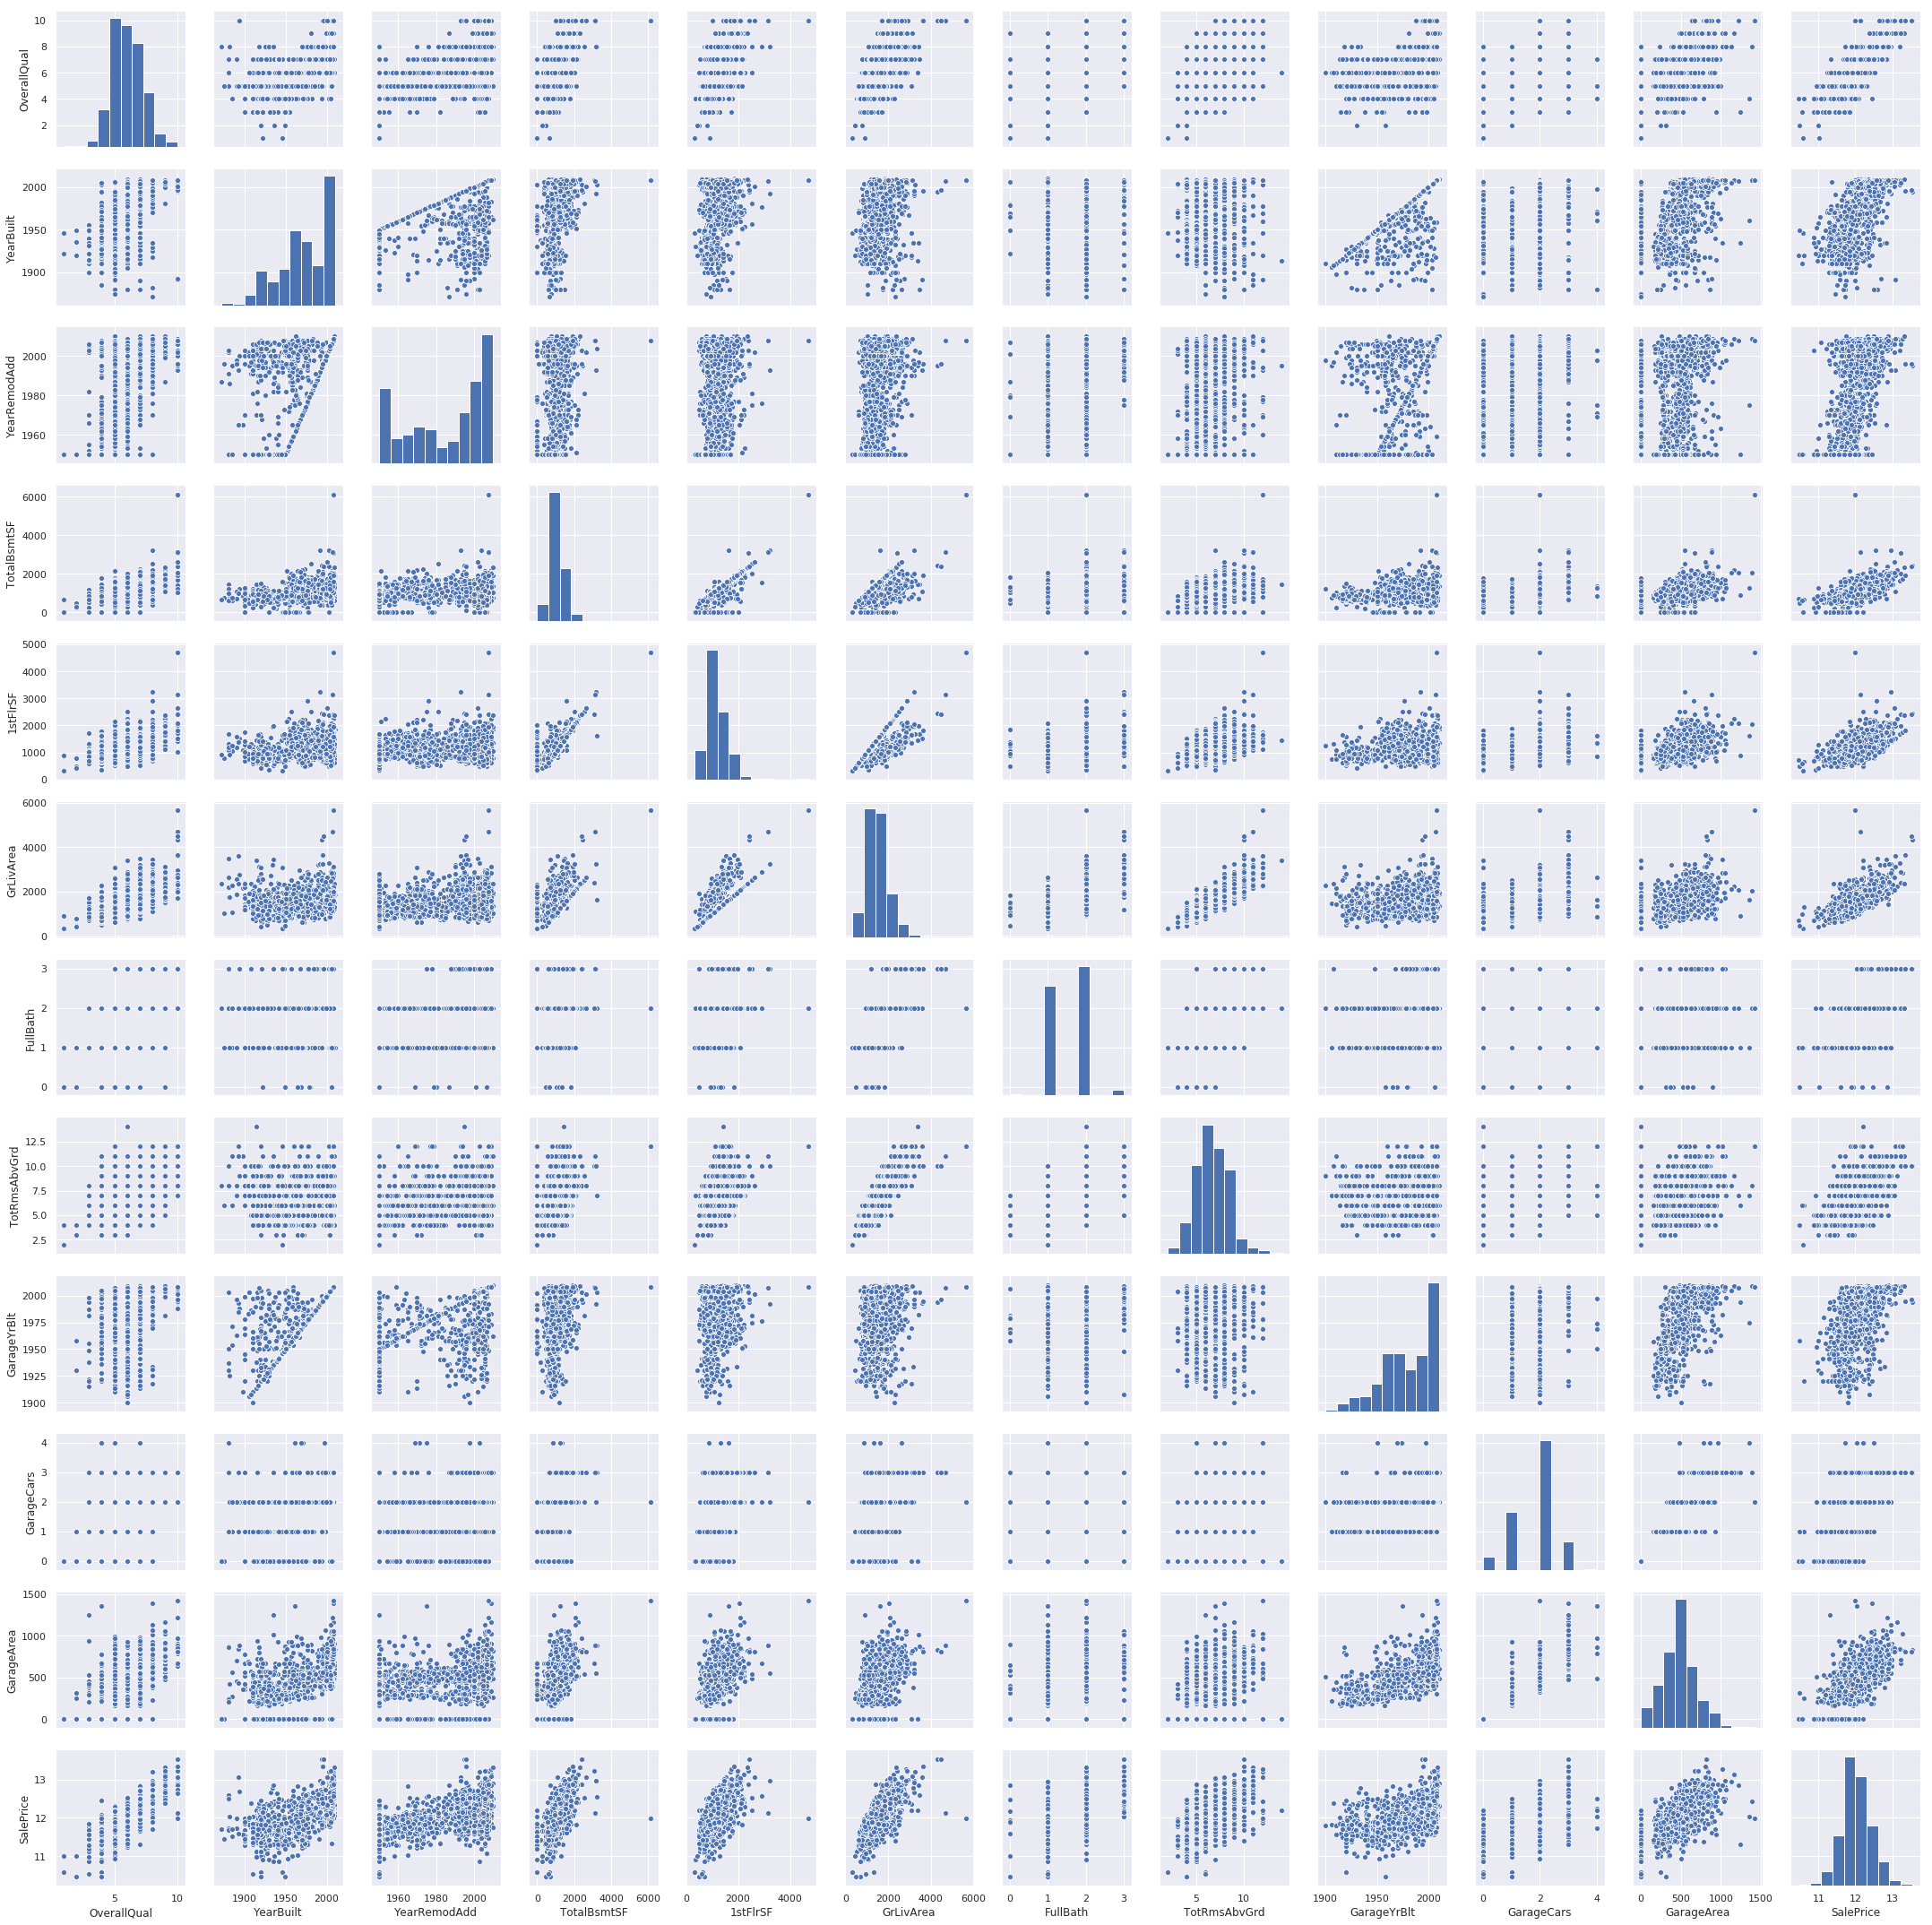

In [16]:
sns.set()
sns.pairplot(df_train[top_variavel])

A variavéis com correlação mais forte com a variável alvo - SalePrice, são:
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* GarageArea

**Dados Ausentes**

In [0]:
# Auto Preenchendo os dados ausentes
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

df_train["Alley"] = df_train["Alley"].fillna("None")

df_train["Fence"] = df_train["Fence"].fillna("None")

df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')
	
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')
	
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

df_train = df_train.drop(['Utilities'], axis=1)

df_train["Functional"] = df_train["Functional"].fillna("Typ")

df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

df_train.drop(['PoolQC'], axis = 1, inplace = True)

In [18]:
#Verificando se ainda há valores ausentes.

df_train.isnull().sum().max() 

0

**Outliers**

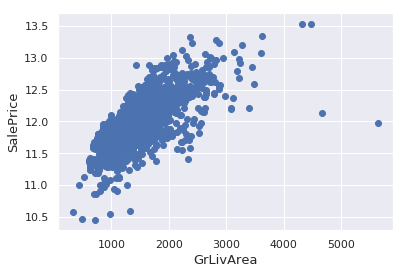

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

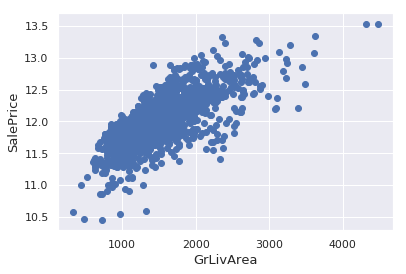

In [20]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 12.5)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Skewed**

In [21]:
numeric_caract = df_train.dtypes[df_train.dtypes != "object"].index

#Verificando o Skew das variáveis numericas
skewed_caract = df_train[numeric_caract].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print('\nSkew das variáveis numericas: \n')
df_skew = pd.DataFrame({'Skew' : skewed_caract})
print(df_skew.head())
print('\n Qtde de variáveis numericas: {}'.format(df_skew.shape[0]))


Skew das variáveis numericas: 

                   Skew
MiscVal       24.434913
PoolArea      15.932532
LotArea       12.560986
3SsnPorch     10.286510
LowQualFinSF   8.995688

 Qtde de variáveis numericas: 37


Normalizando atributos numéricos com MinMaxScaler da Sklearn

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
df_train[numeric_caract] = scaler.fit_transform(df_train[numeric_caract])

**Convertendo algumas variáveis numerica em objeto**



In [0]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [25]:
categoricas = [o for o in df_train.columns if df_train.dtypes[o] == 'object']
print(len(categoricas))
print(categoricas)

45
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [26]:
df_train = pd.get_dummies(df_train, columns = categoricas)
df_train.shape


(1458, 333)

In [27]:
df_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.666667,0.949275,0.883333,0.12250,0.322669,0.0,0.064212,0.266999,...,0,0,0,1,0,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.753623,0.433333,0.00000,0.446984,0.0,0.121575,0.393637,...,0,0,0,1,0,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.934783,0.866667,0.10125,0.222121,0.0,0.185788,0.286962,...,0,0,0,1,0,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.311594,0.333333,0.00000,0.098720,0.0,0.231164,0.235808,...,0,0,0,1,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.927536,0.833333,0.21875,0.299360,0.0,0.209760,0.357143,...,0,0,0,1,0,0,0,0,1,0


# **Modelos de Regressão**

**Preparando o dataset para ser separado em treino e teste**

In [28]:
y = df_train.loc[:,'SalePrice'].values
y

array([0.5814281 , 0.53631636, 0.60402649, ..., 0.66126476, 0.45676822,
       0.46884321])

In [29]:
x = df_train.drop(['SalePrice'], axis = 1)
x.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.666667,0.949275,0.883333,0.12250,0.322669,0.0,0.064212,0.266999,...,0,0,0,1,0,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.753623,0.433333,0.00000,0.446984,0.0,0.121575,0.393637,...,0,0,0,1,0,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.934783,0.866667,0.10125,0.222121,0.0,0.185788,0.286962,...,0,0,0,1,0,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.311594,0.333333,0.00000,0.098720,0.0,0.231164,0.235808,...,0,0,0,1,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.927536,0.833333,0.21875,0.299360,0.0,0.209760,0.357143,...,0,0,0,1,0,0,0,0,1,0


**PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = int(x.shape[1]*0.5))

In [31]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=166, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
print(pca.explained_variance_ratio_.sum())

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var 

0.984435067048733


array([13.2, 18.6, 22.4, 25.3, 28. , 30.5, 32.8, 34.9, 36.8, 38.6, 40.3,
       42. , 43.5, 45. , 46.4, 47.7, 49. , 50.3, 51.5, 52.7, 53.9, 55. ,
       56.1, 57.2, 58.3, 59.3, 60.3, 61.3, 62.2, 63.1, 64. , 64.9, 65.7,
       66.5, 67.3, 68.1, 68.9, 69.6, 70.3, 71. , 71.7, 72.4, 73. , 73.6,
       74.2, 74.8, 75.4, 76. , 76.6, 77.1, 77.6, 78.1, 78.6, 79.1, 79.6,
       80. , 80.4, 80.8, 81.2, 81.6, 82. , 82.4, 82.8, 83.2, 83.6, 83.9,
       84.2, 84.5, 84.8, 85.1, 85.4, 85.7, 86. , 86.3, 86.6, 86.9, 87.2,
       87.5, 87.8, 88.1, 88.3, 88.5, 88.7, 88.9, 89.1, 89.3, 89.5, 89.7,
       89.9, 90.1, 90.3, 90.5, 90.7, 90.9, 91.1, 91.3, 91.5, 91.7, 91.9,
       92.1, 92.3, 92.5, 92.7, 92.9, 93.1, 93.3, 93.5, 93.7, 93.8, 93.9,
       94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6, 94.7, 94.8, 94.9, 95. ,
       95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7, 95.8, 95.9, 96. , 96.1,
       96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8, 96.9, 97. , 97.1, 97.2,
       97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98

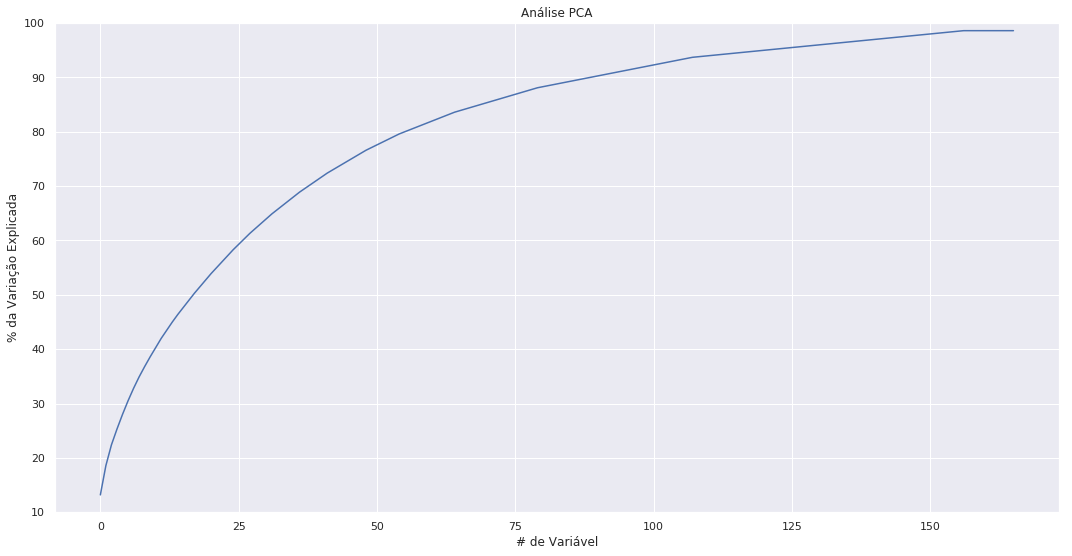

In [33]:
plt.figure(figsize=(18,9))
plt.ylabel('% da Variação Explicada')
plt.xlabel('# de Variável')
plt.title('Análise PCA')
plt.ylim(10,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

Utilizando 75 variáveis e possivel capturar + 85% da variação de preço das casas. Por isto iremos fazer teste com o modelo usando PCA de n_components = 75.

In [34]:
pca = PCA(n_components = 75)
pca.fit(x)
print(pca.explained_variance_ratio_.sum()*100)

86.74979508824259


In [0]:
x_pca = pca.transform(x)

In [36]:
cols_pca = []
for col in range(1,76):
  col = 'PC_' + str(col)
  cols_pca.append(col)
len(cols_pca)

75

In [37]:
x_pca = pd.DataFrame( data = x_pca, columns = cols_pca)
x_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75
0,2.242886,0.642000,0.435171,1.347547,-0.299206,-0.497502,-0.530196,-0.705577,-0.017284,-0.683110,...,-0.040169,0.364621,-0.099158,-0.067812,-0.045592,-0.171406,-0.045162,0.179404,-0.069521,-0.080538
1,-0.367910,-1.085355,-0.044334,0.257768,0.378021,-0.313719,0.458917,-0.459123,-0.327558,0.514402,...,-0.373574,-0.176324,-0.177874,0.764260,-0.066629,0.019217,0.371801,0.149508,-0.247206,0.237299
2,2.657769,0.107790,1.125694,0.566416,0.408019,-0.139086,0.118692,-0.447646,-0.028819,-0.469260,...,0.073365,0.398518,-0.297570,-0.152673,0.015790,-0.192938,0.023916,0.016978,-0.023125,0.318524
3,-0.686094,0.698523,0.838171,-1.480192,0.470616,-0.392685,0.443464,0.818911,0.372549,0.318183,...,-0.091576,0.334840,0.316644,0.159363,-0.178045,-0.155776,-0.376975,0.500267,-0.081971,0.116774
4,2.742402,-0.010575,1.332223,0.350597,0.514597,-0.033960,0.203597,-0.241702,0.311112,-0.655649,...,-0.319250,-0.383904,0.360245,0.168494,0.249892,0.143242,-0.015656,-0.054450,-0.050733,0.099682


Com 75 variáveis temos os exatos 86,74% das variações

**Separa dados de treino e teste**

In [38]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1020, 332)
(1020,)
(438, 332)
(438,)


In [0]:
# Definindo o padrão de score : RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

**Dummy Regressor - Benchmark**

In [0]:
from sklearn.dummy import DummyRegressor
model_dummy = DummyRegressor()

In [41]:
model_dummy.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [0]:
y_train_pred_dummy = model_dummy.predict(X_train)
y_test_pred_dummy = model_dummy.predict(X_test)

In [43]:
print("RMSE on Training set :", rmse_cv_train(model_dummy).mean())
print("RMSE on Test set :", rmse_cv_test(model_dummy).mean())

RMSE on Training set : 0.13071262536971964
RMSE on Test set : 0.1269396054397447


**Lasso**

In [0]:
from sklearn import linear_model
model_lasso = linear_model.Lasso(alpha=0.1, random_state = 40)

In [45]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=40,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_train_pred_lasso = model_lasso.predict(X_train)
y_test_pred_lasso = model_lasso.predict(X_test)

In [47]:
print("RMSE on Training set :", rmse_cv_train(model_lasso).mean())
print("RMSE on Test set :", rmse_cv_test(model_lasso).mean())

RMSE on Training set : 0.13071262536971964
RMSE on Test set : 0.1269396054397447


**Linear Regression Simple**

In [0]:
from sklearn.linear_model import LinearRegression
model_regressor = LinearRegression()

columa_corr = 'GrLivArea' # Variável numerica com maior correlação com a variável alvo - SalePrice

X_train1 = X_train[columa_corr].values.reshape(-1,1)

X_test1 = X_test[columa_corr].values.reshape(-1,1)

In [49]:
print(X_train1.shape)
print(X_test1.shape)

(1020, 1)
(438, 1)


In [50]:
model_regressor.fit(X_train1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_train_pred_simpleregressor = model_regressor.predict(X_train1)
y_test_pred_simpleregressor = model_regressor.predict(X_test1)


In [52]:
print("RMSE on Training set :", rmse_cv_train(model_regressor).mean())
print("RMSE on Test set :", rmse_cv_test(model_regressor).mean())

RMSE on Training set : 1174930725.3572373
RMSE on Test set : 19368995502.224308


**Linear Regression MultiVariables**

In [53]:
print(X_train.shape)
print(X_test.shape)

(1020, 332)
(438, 332)


In [54]:
model_regressor_Multi = LinearRegression()
model_regressor_Multi.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_train_pred_multiregressor = model_regressor_Multi.predict(X_train)
y_test_pred_multiregressor = model_regressor_Multi.predict(X_test)

In [56]:
print("RMSE on Training set :", rmse_cv_train(model_regressor_Multi).mean())
print("RMSE on Test set :", rmse_cv_test(model_regressor_Multi).mean())

RMSE on Training set : 1174930725.3572373
RMSE on Test set : 19368995502.224308


**SVR**

In [0]:
from sklearn.svm import SVR
model_svr = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [58]:
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_train_svr = model_svr.predict(X_train)
y_test_pred_svr = model_svr.predict(X_test)

In [60]:
print("RMSE on Training set :", rmse_cv_train(model_svr).mean())
print("RMSE on Test set :", rmse_cv_test(model_svr).mean())

RMSE on Training set : 0.07462705691199653
RMSE on Test set : 0.0859728987675776


**Decision Tree Regression**

In [0]:
from sklearn.tree import DecisionTreeRegressor
model_decisiontree = DecisionTreeRegressor(random_state=40)

In [62]:
model_decisiontree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=40, splitter='best')

In [0]:
y_train_decisiontree = model_decisiontree.predict(X_train)
y_test_pred_decisiontree = model_decisiontree.predict(X_test)

In [64]:
print("RMSE on Training set :", rmse_cv_train(model_decisiontree).mean())
print("RMSE on Test set :", rmse_cv_test(model_decisiontree).mean())

RMSE on Training set : 0.06761217267945004
RMSE on Test set : 0.07600780516177373


**Randon Forest Regression**

In [0]:
from sklearn.ensemble import RandomForestRegressor
model_randomforest = RandomForestRegressor(max_depth=2, n_estimators=100, random_state=40)

In [66]:
model_randomforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [0]:
y_train_decisiontree = model_randomforest.predict(X_train)
y_test_pred_decisiontree = model_randomforest.predict(X_test)

In [68]:
print("RMSE on Training set :", rmse_cv_train(model_randomforest).mean())
print("RMSE on Test set :", rmse_cv_test(model_randomforest).mean())

RMSE on Training set : 0.0757464649593773
RMSE on Test set : 0.07416484852022152


In [69]:
scorer_randonforest = model_randomforest.score(X_test, y_test)
scorer_randonforest

0.6495593292427022

**Pipeline**

In [0]:
# Criação do pipeline de treino dos modelos

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Medindo o tempo de criação do modelo
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    
    # Calculando tempo de treino
    results['train_time'] = end - start
        
    # medindo o tempo de prever
    start = time() # Get start time
    predictions_train = learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    end = time() # Get end time
    
    # Calculando o tempo de prever
    results['pred_time'] = end - start
            
    # RMSE de Treino
    results['rmse_train'] = rmse_cv_train(learner).mean()

    # RMSE de Teste
    results['rmse_test'] = rmse_cv_test(learner).mean()
	
    # Successo
    print("Modelo {} demorou {} de criação(fit) e {} para prever(predict) com o RMSE do dataset de treino de {} e o RMSE do dataset de teste {}.".format(learner.__class__.__name__, results['train_time'], results['pred_time'], results['rmse_train'], results['rmse_test']))
        
    # Return do resultados
    return results

In [71]:
# Importe os modelos de Regressão da sklearn
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Inicialize os modelos

clf_A = DummyRegressor()
clf_B = linear_model.Lasso(alpha=0.1, random_state = 40)
clf_C = LinearRegression()
clf_D = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf_E = DecisionTreeRegressor(random_state=40)
clf_F = RandomForestRegressor(max_depth=2, n_estimators=100, random_state=40)



# Colete os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

Modelo DummyRegressor demorou 0.00043320655822753906 de criação(fit) e 0.0002346038818359375 para prever(predict) com o RMSE do dataset de treino de 0.13071262536971964 e o RMSE do dataset de teste 0.1269396054397447.
Modelo Lasso demorou 0.007603645324707031 de criação(fit) e 0.003532886505126953 para prever(predict) com o RMSE do dataset de treino de 0.13071262536971964 e o RMSE do dataset de teste 0.1269396054397447.
Modelo LinearRegression demorou 0.048775434494018555 de criação(fit) e 0.004553318023681641 para prever(predict) com o RMSE do dataset de treino de 1174930725.3572373 e o RMSE do dataset de teste 19368995502.224308.
Modelo SVR demorou 0.02179265022277832 de criação(fit) e 0.026124238967895508 para prever(predict) com o RMSE do dataset de treino de 0.07462705691199653 e o RMSE do dataset de teste 0.0859728987675776.
Modelo DecisionTreeRegressor demorou 0.04527091979980469 de criação(fit) e 0.004967927932739258 para prever(predict) com o RMSE do dataset de treino de 0.067

In [72]:
desempenho = results
desempenho

{'DecisionTreeRegressor': {'pred_time': 0.004967927932739258,
  'rmse_test': 0.07600780516177373,
  'rmse_train': 0.06761217267945004,
  'train_time': 0.04527091979980469},
 'DummyRegressor': {'pred_time': 0.0002346038818359375,
  'rmse_test': 0.1269396054397447,
  'rmse_train': 0.13071262536971964,
  'train_time': 0.00043320655822753906},
 'Lasso': {'pred_time': 0.003532886505126953,
  'rmse_test': 0.1269396054397447,
  'rmse_train': 0.13071262536971964,
  'train_time': 0.007603645324707031},
 'LinearRegression': {'pred_time': 0.004553318023681641,
  'rmse_test': 19368995502.224308,
  'rmse_train': 1174930725.3572373,
  'train_time': 0.048775434494018555},
 'RandomForestRegressor': {'pred_time': 0.015944242477416992,
  'rmse_test': 0.07416484852022152,
  'rmse_train': 0.0757464649593773,
  'train_time': 0.41121554374694824},
 'SVR': {'pred_time': 0.026124238967895508,
  'rmse_test': 0.0859728987675776,
  'rmse_train': 0.07462705691199653,
  'train_time': 0.02179265022277832}}

In [73]:
df_desempenho = pd.DataFrame(desempenho)
df_desempenho

,DummyRegressor,Lasso,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
pred_time,0.000235,0.003533,4.553318e-03,0.026124,0.004968,0.015944
rmse_test,0.126940,0.126940,1.936900e+10,0.085973,0.076008,0.074165
rmse_train,0.130713,0.130713,1.174931e+09,0.074627,0.067612,0.075746
train_time,0.000433,0.007604,4.877543e-02,0.021793,0.045271,0.411216


**Modelos para dataset PCA**

In [74]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.3, random_state=40)

print(X_train_pca.shape)
print(y_train_pca.shape)
print(X_test_pca.shape)
print(y_test_pca.shape)

(1020, 75)
(1020,)
(438, 75)
(438,)


In [75]:
# Colete os resultados dos algoritmos de aprendizado com o dataset reduzido - PCA
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Modelo DummyRegressor demorou 0.0010991096496582031 de criação(fit) e 0.00014925003051757812 para prever(predict) com o RMSE do dataset de treino de 0.13071262536971964 e o RMSE do dataset de teste 0.1269396054397447.
Modelo Lasso demorou 0.0026674270629882812 de criação(fit) e 0.002094268798828125 para prever(predict) com o RMSE do dataset de treino de 0.13071262536971964 e o RMSE do dataset de teste 0.1269396054397447.
Modelo LinearRegression demorou 0.007508039474487305 de criação(fit) e 0.008199930191040039 para prever(predict) com o RMSE do dataset de treino de 1174930725.3572373 e o RMSE do dataset de teste 19368995502.224308.
Modelo SVR demorou 0.008835315704345703 de criação(fit) e 0.009551763534545898 para prever(predict) com o RMSE do dataset de treino de 0.07462705691199653 e o RMSE do dataset de teste 0.0859728987675776.
Modelo DecisionTreeRegressor demorou 0.06993222236633301 de criação(fit) e 0.0025701522827148438 para prever(predict) com o RMSE do dataset de treino de 0.

In [76]:
desempenho_pca = results
desempenho_pca

{'DecisionTreeRegressor': {'pred_time': 0.0025701522827148438,
  'rmse_test': 0.07600780516177373,
  'rmse_train': 0.06761217267945004,
  'train_time': 0.06993222236633301},
 'DummyRegressor': {'pred_time': 0.00014925003051757812,
  'rmse_test': 0.1269396054397447,
  'rmse_train': 0.13071262536971964,
  'train_time': 0.0010991096496582031},
 'Lasso': {'pred_time': 0.002094268798828125,
  'rmse_test': 0.1269396054397447,
  'rmse_train': 0.13071262536971964,
  'train_time': 0.0026674270629882812},
 'LinearRegression': {'pred_time': 0.008199930191040039,
  'rmse_test': 19368995502.224308,
  'rmse_train': 1174930725.3572373,
  'train_time': 0.007508039474487305},
 'RandomForestRegressor': {'pred_time': 0.014138936996459961,
  'rmse_test': 0.07416484852022152,
  'rmse_train': 0.0757464649593773,
  'train_time': 0.9253649711608887},
 'SVR': {'pred_time': 0.009551763534545898,
  'rmse_test': 0.0859728987675776,
  'rmse_train': 0.07462705691199653,
  'train_time': 0.008835315704345703}}

In [77]:
df_desempenho_pca = pd.DataFrame(desempenho_pca)
df_desempenho_pca

,DummyRegressor,Lasso,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
pred_time,0.000149,0.002094,8.199930e-03,0.009552,0.002570,0.014139
rmse_test,0.126940,0.126940,1.936900e+10,0.085973,0.076008,0.074165
rmse_train,0.130713,0.130713,1.174931e+09,0.074627,0.067612,0.075746
train_time,0.001099,0.002667,7.508039e-03,0.008835,0.069932,0.925365


**Avaliar resultado de tempo e de erro com e sem PCA**

In [78]:
resultado = df_desempenho - df_desempenho_pca
resultado

,DummyRegressor,Lasso,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
pred_time,0.000085,0.001439,-0.003647,0.016572,0.002398,0.001805
rmse_test,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rmse_train,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
train_time,-0.000666,0.004936,0.041267,0.012957,-0.024661,-0.514149


Podemos ver que não tivemos alteração na métrica de avaliação (RMSE - Root Mean Square Error)

Tivemos uma ligeira melhora de desempenho nos algoritmos exceto para Decision Tree Regressor e Random Forest Regressor.

Concluo não ser necessário o uso do PCA para melhoria do desempenho.

Obs: Este Jupyter notebook foi resultado no Google Colab!



**Tunning o melhor algoritmo**

In [79]:
menor_rmse_treino = df_desempenho.loc['rmse_train',:].min()
melhor_algoritmo_treino = df_desempenho.loc['rmse_train'] == menor_rmse_treino
melhor_algoritmo_treino

DummyRegressor           False
Lasso                    False
LinearRegression         False
SVR                      False
DecisionTreeRegressor     True
RandomForestRegressor    False
Name: rmse_train, dtype: bool

In [80]:
menor_rmse_teste = df_desempenho.loc['rmse_test',:].min()
melhor_algoritmo_teste = df_desempenho.loc['rmse_test'] == menor_rmse_teste
melhor_algoritmo_teste

DummyRegressor           False
Lasso                    False
LinearRegression         False
SVR                      False
DecisionTreeRegressor    False
RandomForestRegressor     True
Name: rmse_test, dtype: bool

In [81]:
df_desempenho.loc[['rmse_train', 'rmse_test'],['DecisionTreeRegressor', 'RandomForestRegressor']]

,DecisionTreeRegressor,RandomForestRegressor
rmse_train,0.067612,0.075746
rmse_test,0.076008,0.074165


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

In [0]:
clf_randomforest = RandomForestRegressor()

In [0]:
parameters = {
            'n_estimators' : [100, 150, 300],
            'max_depth' : [3, 5, 10],
            'min_samples_split' : [3, 5, 10]
            }


In [0]:
grid_obj = GridSearchCV(clf_randomforest, parameters)

In [0]:
grid_fit = grid_obj.fit(X_train, y_train)

In [0]:
# Recuperar o estimador
best_clf = grid_fit.best_estimator_

# Realizar predições utilizando o modelo não otimizado e modelar
predictions = (clf_randomforest.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [88]:
scorer_randonforest_gridsearch = clf_randomforest.score(X_test, y_test)
scorer_randonforest_gridsearch

0.859504259600831

In [89]:
rmse_test_rfr_gridsearch = rmse_cv_test(clf_randomforest).mean()
rmse_test_rfr_gridsearch

0.0544220214994065

In [90]:
# Reportar os scores de antes e de depois
print ("Unoptimized model\n------")
print("Score on Test set :", scorer_randonforest)
print("RMSE on Test set :", df_desempenho.loc['rmse_test','RandomForestRegressor'])

print ("\nOptimized Model\n------")
print("Score on Test set :", scorer_randonforest_gridsearch)
print("RMSE on Test set :", rmse_test_rfr_gridsearch)

Unoptimized model
------
Score on Test set : 0.6495593292427022
RMSE on Test set : 0.07416484852022152

Optimized Model
------
Score on Test set : 0.859504259600831
RMSE on Test set : 0.0544220214994065
